# Predictive Modeling and Evaluation - Dataset 2  

In this notebook, we build and evaluate baseline predictive models using **Dataset 2**, which contains both numeric and categorical features.  
The main goals are:  

- Prepare the data for machine learning (encoding categorical features, scaling numeric features, train/test split).  
- Train and evaluate baseline models (Logistic Regression and Random Forest).  
- Assess performance using Accuracy, Precision, Recall, F1-score, and ROC-AUC.  
- Analyze feature importance and model interpretability for each model.  
- Establish a reference point for comparative analysis with Dataset 1.  


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, RocCurveDisplay, classification_report
from sklearn.linear_model import LogisticRegression

import joblib

In [12]:
data = pd.read_csv('../data/cleaned_data/dataset2_cleaned.csv')
data

,age,gender,cholesterol,pressure_high,heart_rate,smoking,alcohol_intake,exercise_hours,family_history,diabetes,obesity,stress_level,blood_sugar,exercise_induced_angina,chest_pain_type,heart_disease
0,75,0,228,119,66,1,2,1,0,0,1,8,119,1,atypical angina,1
1,48,1,204,165,62,1,0,5,0,0,0,9,70,1,typical angina,0
2,53,1,234,91,67,0,2,3,1,0,1,5,196,1,atypical angina,1
3,69,0,192,90,72,1,0,4,0,1,0,7,107,1,non-anginal pain,0
4,62,0,172,163,93,0,0,6,0,1,0,2,183,1,asymptomatic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,0,269,111,86,0,2,5,0,1,1,10,120,0,non-anginal pain,1
996,78,0,334,145,76,0,0,6,0,0,0,10,196,1,typical angina,1
997,79,1,151,179,81,0,1,4,1,0,1,8,189,1,asymptomatic,0
998,60,0,326,151,68,2,0,8,1,1,0,5,174,1,atypical angina,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      1000 non-null   int64 
 1   gender                   1000 non-null   int64 
 2   cholesterol              1000 non-null   int64 
 3   pressure_high            1000 non-null   int64 
 4   heart_rate               1000 non-null   int64 
 5   smoking                  1000 non-null   int64 
 6   alcohol_intake           1000 non-null   int64 
 7   exercise_hours           1000 non-null   int64 
 8   family_history           1000 non-null   int64 
 9   diabetes                 1000 non-null   int64 
 10  obesity                  1000 non-null   int64 
 11  stress_level             1000 non-null   int64 
 12  blood_sugar              1000 non-null   int64 
 13  exercise_induced_angina  1000 non-null   int64 
 14  chest_pain_type          1000 non-null   

In [14]:
data['chest_pain_type'].nunique()

4

In [15]:
data_encoded = (
    pd.get_dummies(data, columns=["chest_pain_type"], drop_first=True)
    .rename(columns=lambda x: x.replace(" ", "_").replace("-", "_"))
    .astype(int)
)
data_encoded.head()

,age,gender,cholesterol,pressure_high,heart_rate,smoking,alcohol_intake,exercise_hours,family_history,diabetes,obesity,stress_level,blood_sugar,exercise_induced_angina,heart_disease,chest_pain_type_atypical_angina,chest_pain_type_non_anginal_pain,chest_pain_type_typical_angina
0,75,0,228,119,66,1,2,1,0,0,1,8,119,1,1,1,0,0
1,48,1,204,165,62,1,0,5,0,0,0,9,70,1,0,0,0,1
2,53,1,234,91,67,0,2,3,1,0,1,5,196,1,1,1,0,0
3,69,0,192,90,72,1,0,4,0,1,0,7,107,1,0,0,1,0
4,62,0,172,163,93,0,0,6,0,1,0,2,183,1,0,0,0,0


In [16]:
X = data_encoded.drop('heart_disease', axis=1)
y = data_encoded['heart_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       122
           1       0.86      0.79      0.83        78

    accuracy                           0.87       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.87      0.87       200



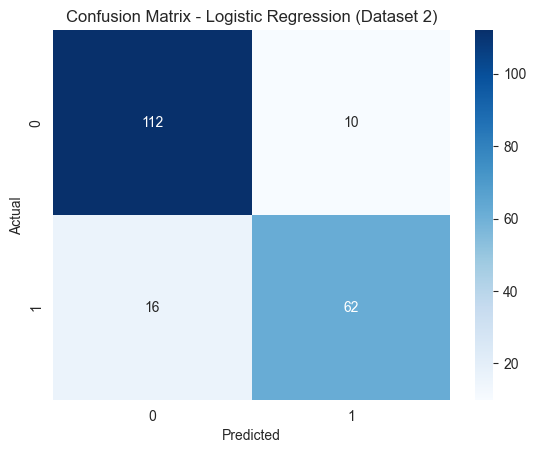

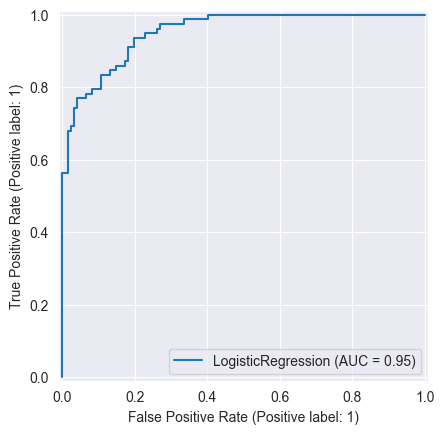

In [17]:


log_reg = LogisticRegression(random_state=42, max_iter=1000)

log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)

# Evaluate performance
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# report = classification_report(y_test, y_pred, output_dict=True)
# dataset2_report = pd.DataFrame(report).transpose()
# dataset2_report.to_csv("../data/stats_results/logistic_regression_classification_report_ds2.csv", index=True)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Dataset 2)")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(log_reg, X_test_scaled, y_test)
plt.show()

## Summary

In this notebook, we applied **Logistic Regression** to **Dataset 2** in order to evaluate its predictive performance.  
The data preparation included one-hot encoding of categorical features, train/test split, and feature scaling.  

The model achieved an **overall accuracy of 87%**, with a **precision of 0.88** for class 0 (no heart disease) and **0.86** for class 1 (heart disease).  
Recall values were **0.92** and **0.79** respectively, indicating that the model performs slightly better in detecting patients without heart disease compared to those with the condition.  
The **F1-scores** of 0.90 (class 0) and 0.83 (class 1) suggest a good balance between precision and recall.  

The **confusion matrix** confirms these findings:  
- 112 true negatives (correctly identified as no disease).  
- 62 true positives (correctly identified as disease).  
- 10 false positives (incorrectly predicted disease).  
- 16 false negatives (missed cases of disease).  

The **ROC curve** shows an **AUC of 0.95**, which reflects excellent discriminative ability between the two classes.  

Overall, Logistic Regression provides strong performance on Dataset 2, particularly with high accuracy and a very strong ROC-AUC score. However, the model tends to slightly underperform in recall for the positive class (patients with heart disease), which may be important in medical applications where missing true cases could be critical.  


In [18]:
# Extract and rank feature importance from Logistic Regression coefficients
# - Coefficient sign (+/-) indicates direction of impact on heart disease prediction
# - Absolute value of coefficient shows the strength of influence
# - Sorting helps us identify the most important predictors
coefficients = log_reg.coef_[0]

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": coefficients
})

feature_importance["Abs_Coefficient"] = feature_importance["Coefficient"].abs()
feature_importance = feature_importance.sort_values(by="Abs_Coefficient", ascending=False)

feature_importance

,Feature,Coefficient,Abs_Coefficient
0,age,3.002103,3.002103
2,cholesterol,2.015132,2.015132
9,diabetes,0.200550,0.200550
1,gender,0.177837,0.177837
8,family_history,0.163012,0.163012
13,exercise_induced_angina,0.085491,0.085491
15,chest_pain_type_non_anginal_pain,-0.078385,0.078385
5,smoking,-0.077337,0.077337
16,chest_pain_type_typical_angina,0.076578,0.076578
6,alcohol_intake,0.071316,0.071316


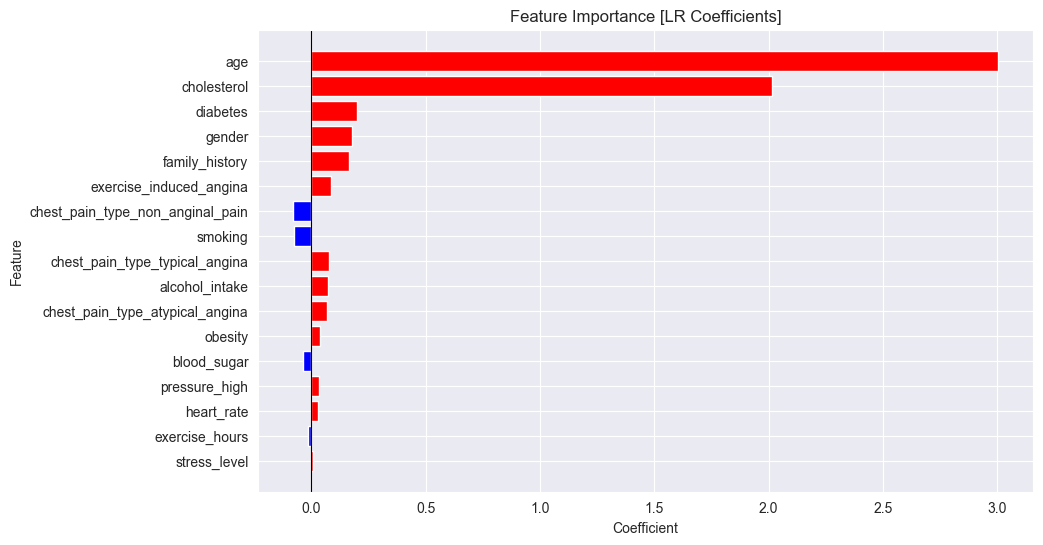

In [19]:
# Visualize the ranked feature importance from Logistic Regression
# - Features are sorted by absolute coefficient values (most important at the top)
# - Red bars indicate positive impact on heart disease prediction (higher risk)
# - Blue bars indicate negative impact (protective effect)
# - The vertical line at 0 separates positive vs negative influence
feature_importance_sorted = feature_importance.sort_values(
    by="Abs_Coefficient", ascending=True
)

plt.figure(figsize=(10,6))
plt.barh(
    feature_importance_sorted["Feature"], 
    feature_importance_sorted["Coefficient"], 
    color=["red" if c > 0 else "blue" for c in feature_importance_sorted["Coefficient"]]
)
plt.title("Feature Importance [LR Coefficients]")
plt.axvline(0, color="black", linewidth=0.8)
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.show()

## Final Summary

In this notebook, we applied **Logistic Regression** to **Dataset 2**, which includes both numerical and categorical features (encoded using One-Hot Encoding). After splitting the data into training and testing sets and applying feature scaling, the model was trained and evaluated.

### Key Results:
- **Accuracy:** 87%  
- **Precision:**  
  - Class 0 (No Disease): 0.88  
  - Class 1 (Disease): 0.86  
- **Recall:**  
  - Class 0: 0.92  
  - Class 1: 0.79  
- **F1-score:**  
  - Class 0: 0.90  
  - Class 1: 0.83  
- **ROC-AUC:** 0.95 → Excellent discriminative ability.

### Interpretation:
- The confusion matrix shows that the model performs very well overall, with only 10 false positives and 16 false negatives.  
- The ROC curve confirms strong separation between the two classes.  
- **Feature importance analysis** highlights which variables (both numerical and categorical) contribute most to predicting heart disease, allowing for better interpretability.  
- The model tends to slightly underperform in detecting **positive cases (heart disease)**, as recall for class 1 is lower compared to class 0. This is an important consideration in medical contexts.

### Conclusion:
Logistic Regression demonstrates **strong predictive performance** on Dataset 2, with high accuracy and an excellent ROC-AUC score. The results provide a reliable baseline for comparison with more complex models (e.g., Random Forest) in the next steps of the project.


In [20]:
# data_encoded.to_csv("../data/preprocessed_rf/dataset_2_preprocessed.csv", index=False)